In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# News Category Dataset

## Context

### Dataset Overview: News Headlines (2012-2022)

- **Total Headlines:** Approximately 210,000
- **Time Span:** 2012 to 2022
- **Data Distribution:**
  - **2012 - May 2018:** ~200,000 headlines
  - **May 2018 - 2022:** ~10,000 headlines

## Content

Each record in the dataset consists of the following attributes:

- **category**: category in which the article was published.
- **headline**: the headline of the news article.
- **authors**: list of authors who contributed to the article.
- **link**: link to the original news article.
- **short_description**: Abstract of the news article.
- **date**: publication date of the article.

# Architechture 

- **Overview**
- **Text Preparation**
- **Exploratory Data Analysis (EDA)**
- **Traditional ML Approach**
- **Deep Learning Approach**
- **Transfer Learning Approach**

# Overview

In [2]:
import pandas as pd
import numpy as np

# Show all columns
pd.set_option("display.max_columns", None)

# Show all rows
pd.set_option("display.max_rows", None)

# Set maximum column width to None to avoid truncation
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_json("/kaggle/input/news-category-dataset/News_Category_Dataset_v3.json", lines = True)
df.sample(5)

FileNotFoundError: File /kaggle/input/news-category-dataset/News_Category_Dataset_v3.json does not exist

- The dataset covers diverse topics, such as "World News," "Wellness," "Travel," "Business," etc.
- We can remove the link because the words in the link are already present in the headline.
- Separate the year, month, and day of the week.
- Check whether all entries in the "category" column are in uppercase.
- Check which cells are empty.


In [4]:
# What is the size of the dataset?

# Provide information about the number of rows and columns
df.shape


(209527, 6)

- **Rows:** 209,527
- **Columns:** 6


In [5]:
# What are the data types of the columns?

# Show the basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


- The data types of the columns are object type, except for the "data" column.


In [6]:
# Are there any missing values in the dataset?
df.isnull().sum()


link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

- There are no missing values.


In [7]:
# What does the data look like?
df.describe(include=['object', 'datetime'])


,link,headline,category,short_description,authors,date
count,209527,209527,209527,209527,209527,209527
unique,209486,207996,42,187022,29169,NaN
top,https://www.huffingtonpost.comhttps://www.washingtonpost.com/politics/divisions-within-gop-over-trumps-candidacy-are-growing/2016/02/28/97b16010-de3a-11e5-8d98-4b3d9215ade1_story.html,Sunday Roundup,POLITICS,,,NaN
freq,2,90,35602,19712,37418,NaN
mean,NaN,NaN,NaN,NaN,NaN,2015-04-30 00:44:14.344308736
min,NaN,NaN,NaN,NaN,NaN,2012-01-28 00:00:00
25%,NaN,NaN,NaN,NaN,NaN,2013-08-10 00:00:00
50%,NaN,NaN,NaN,NaN,NaN,2015-03-16 00:00:00
75%,NaN,NaN,NaN,NaN,NaN,2016-11-01 00:00:00
max,NaN,NaN,NaN,NaN,NaN,2022-09-23 00:00:00


- 50% of the data is from 2012 to 2015.
- The remaining 50% of the data is from 2015 to 2022.


In [8]:
# Are there any duplicate entries in the dataset?
df.duplicated().sum()


13

- There are 13 duplicate values present.


In [9]:
# Checking the number of unique categories in each column
df.nunique()


link                 209486
headline             207996
category                 42
short_description    187022
authors               29169
date                   3890
dtype: int64

- There are 42 categories in the category column, but we need to work on only the top 15 categories.
- With so many unique authors, it introduces more noise than value, eliminate it.
- In the date column, separate the year, month, and day.

## Text Preparation 


In [10]:
# Extracting the top 15 categories
top_15_categories = df['category'].value_counts().nlargest(15)

# Updating the dataset to include only the top 15 categories
df = df[df['category'].isin(top_15_categories.index)]

top_15_categories


category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
Name: count, dtype: int64

In [11]:
# Removing the 'link' and 'authors' columns
df = df.drop(columns=["link", "authors"])


In [12]:
# Separating the year, month, and day of the week from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.strftime('%b')  # Abbreviated month names (e.g., Jan, Feb)
df['day_of_week'] = df['date'].dt.day_name()  # Full names of the days (e.g., Monday)

# Dropping the date column
df = df.drop(columns=["date"])

# Removing duplicate entries
df = df.drop_duplicates()


In [13]:
df.sample()

,headline,category,short_description,year,month,day_of_week
38438,Misconceptions Of A Socially Anxious Person,HEALTHY LIVING,"Following in the theme of my previous post, I thought I’d debunk some ideas that people have when it comes to those who suffer",2017,Apr,Sunday


In [14]:
from bs4 import BeautifulSoup
import re


import nltk
nltk.download('brown')
nltk.download('punkt')


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package brown to /usr/share/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


- Remove HTML tags.


In [15]:
# Removing HTML tags (although there are no HTML elements in the dataset except in the link feature)

# Assuming your dataframe is named 'df'
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Apply the cleaning function to the specified columns
columns_to_clean = ['headline', 'category', 'short_description']
for column in columns_to_clean:
    df[column] = df[column].apply(clean_html)


/tmp/ipykernel_30/2231838842.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
/tmp/ipykernel_30/2231838842.py:5: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


- Strip out emojis or convert them into a textual representation.

In [16]:
# Function to remove emojis from text
def remove_emojis(text):
    pattern = re.compile(
        "["u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # geometric shapes extended
        u"\U0001F800-\U0001F8FF"  # supplemental arrows-C
        u"\U0001F900-\U0001F9FF"  # supplemental symbols and pictographs
        u"\U0001FA00-\U0001FA6F"  # chess symbols
        u"\U0001FA70-\U0001FAFF"  # symbols and pictographs extended-A
        u"\U00002702-\U000027B0"  # dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE)
    return pattern.sub(r'', text)

# Apply the emoji removal function to the specified columns
columns_to_clean = ['headline', 'category', 'short_description']
for column in columns_to_clean:
    df[column] = df[column].apply(remove_emojis)


In [17]:
import nltk

# Downloading the necessary packages to a custom directory
nltk.download('punkt', download_dir='/kaggle/working')
nltk.download('stopwords', download_dir='/kaggle/working')
nltk.download('wordnet', download_dir='/kaggle/working')
nltk.download('omw-1.4', download_dir='/kaggle/working')

# Setting the NLTK data path
nltk.data.path.append('/kaggle/working')

# Now you can run the rest of your code


[nltk_data] Downloading package punkt to /kaggle/working...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /kaggle/working...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /kaggle/working...
[nltk_data] Downloading package omw-1.4 to /kaggle/working...


- **Sequence of Steps:**
  - **Lowercasing:** Convert all text to lowercase to ensure uniformity.
  - **Removing Digits and Punctuation:** Clean the text by removing unwanted characters.
  - **Sentence Tokenization:** Split text into individual sentences.
  - **Word Tokenization:** Split sentences into individual words.
  - **Stop Word Removal:** Eliminate common words that do not contribute to the text's meaning.
  - **Lemmatization:** Reduce words to their root forms or base forms.


In [18]:
!unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/


Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [19]:
import pandas as pd
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure that you have downloaded the necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize stop words, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove digits and punctuation
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Sentence tokenization
    sentences = sent_tokenize(text)

    # Word tokenization and processing for each sentence
    processed_text = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        # Remove stop words
        words = [word for word in words if word not in stop_words]
        # Apply stemming and lemmatization
        words = [lemmatizer.lemmatize(word) for word in words]
        processed_text.extend(words)
    
    return processed_text

# Apply the preprocessing function to the specified columns
columns_to_process = ['headline', 'short_description']
for column in columns_to_process:
    df[column + '_processed'] = df[column].apply(preprocess_text)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [20]:
df.sample(3)

,headline,category,short_description,year,month,day_of_week,headline_processed,short_description_processed
136523,"Treadmill Desks Burn Calories And Boost Work Performance, Study Suggests",WELLNESS,"Treadmill desks may not only help employees burn calories while at work -- using them could also, over time, improve productivity",2014,Mar,Monday,"[treadmill, desk, burn, calorie, boost, work, performance, study, suggests]","[treadmill, desk, may, help, employee, burn, calorie, work, using, could, also, time, improve, productivity]"
178685,"Best Vacuum Cleaners, Record Players And Other Top Buying Guides From 2012",HOME & LIVING,We've compiled our best buying guides of 2012.,2012,Dec,Tuesday,"[best, vacuum, cleaner, record, player, top, buying, guide]","[weve, compiled, best, buying, guide]"
159702,Mark O'Mara: If George Zimmerman Were Black 'He Never Would've Been Charged With A Crime',BLACK VOICES,Zimmerman was found not guilty on all counts after being charged with second-degree murder for the fatal shooting of Martin,2013,Jul,Sunday,"[mark, omara, george, zimmerman, black, never, wouldve, charged, crime]","[zimmerman, found, guilty, count, charged, seconddegree, murder, fatal, shooting, martin]"


# EDA

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

- Visualization of the top 15 category frequencies.


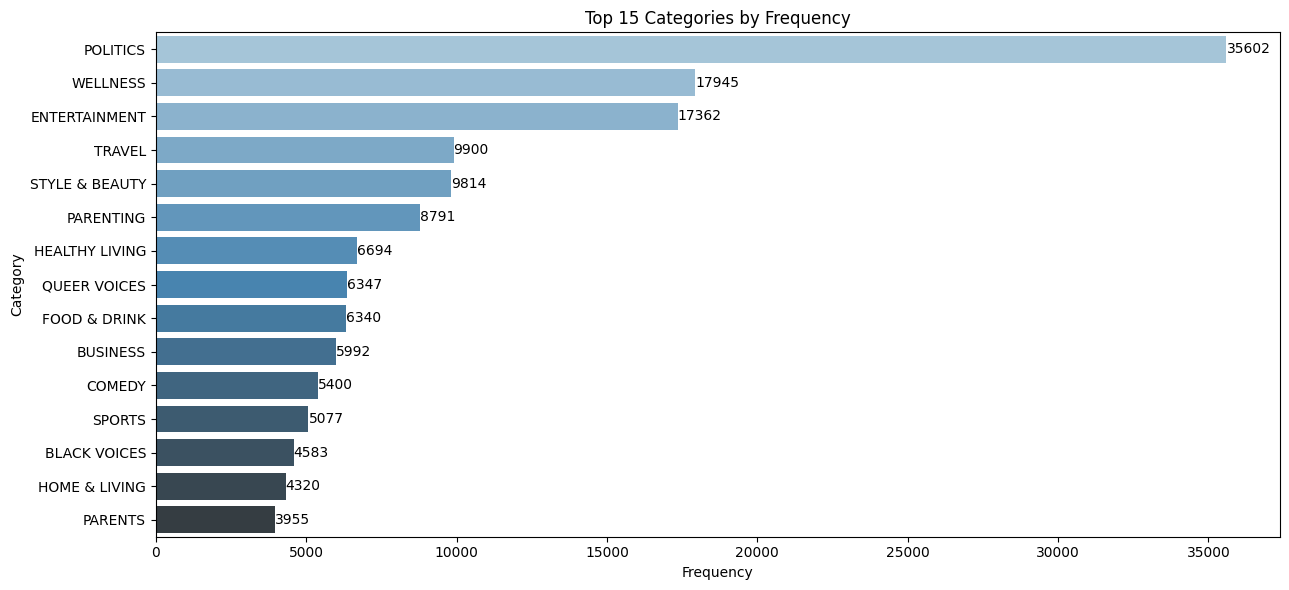

In [24]:
# Create a horizontal bar chart
plt.figure(figsize=(13, 6))
sns.barplot(x=top_15_categories.values, y=top_15_categories.index, palette='Blues_d')

# Display frequency values at the end of each bar
for i, value in enumerate(top_15_categories.values):
    plt.text(value, i, f'{int(value)}', va='center')

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 15 Categories by Frequency')
plt.tight_layout()
plt.show()


- The data is unbalanced.
- The Politics category is the most prevalent (35k), followed by Wellness (17k) and Entertainment (17k).
- We can conclude that:
    - There is a strong interest in politics.
    - There is a growing awarness of wellness.
    - There is a focus on travel and beauty.

**Quesiton**
- "Parent" and "Parenting" can be considered similar but have different category names.
- Are there any other categories that are similar?


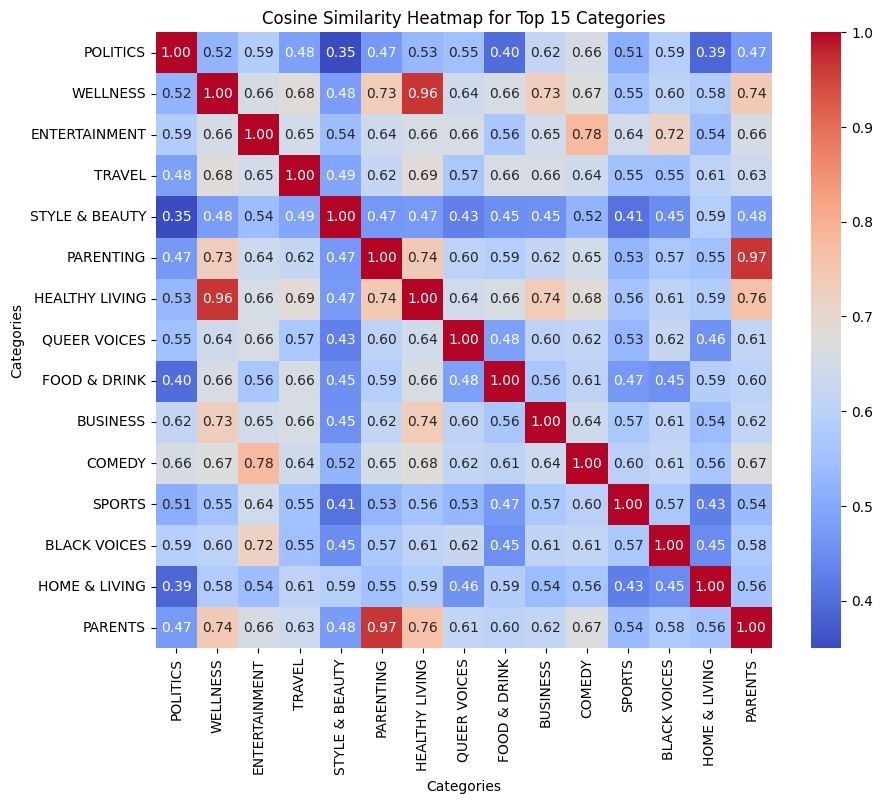

In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract the top 15 categories
top_15_categories = df['category'].value_counts().nlargest(15).index

# Step 2: Create a dictionary to hold concatenated texts for each category
concatenated_texts = {}
for category in top_15_categories:
    concatenated_texts[category] = ' '.join(df[df['category'] == category]['short_description_processed'].dropna().astype(str))

# Step 3: Vectorize the concatenated texts using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(list(concatenated_texts.values()))

# Step 4: Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

# Step 5: Create a DataFrame for the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=concatenated_texts.keys(), columns=concatenated_texts.keys())

# Step 6: Plot the heatmap to visualize the cosine similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_df, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Cosine Similarity Heatmap for Top 15 Categories')
plt.xlabel('Categories')
plt.ylabel('Categories')
plt.show()


**Highest Cosine Similarities**
- "WELLNESS" & "HEALTHY LIVING" have a cosine similarity of 0.96.
- "PARENT" & "PARENTING" have a cosine similarity of 0.97.

- We can combine these two categories into one.


In [26]:
# Replace 'Parenting' with 'Parents' in the category column
df['category'] = df['category'].replace('PARENTING', 'PARENTS')
df['category'] = df['category'].replace('HEALTHY LIVING', 'WELLNESS')


In [27]:
# Extracting the top 13 categories
top_13_categories = df['category'].value_counts().nlargest(13)

# Updating the dataset to include only the top 13 categories
df = df[df['category'].isin(top_13_categories.index)]

- Visualization of the top 13 categories.

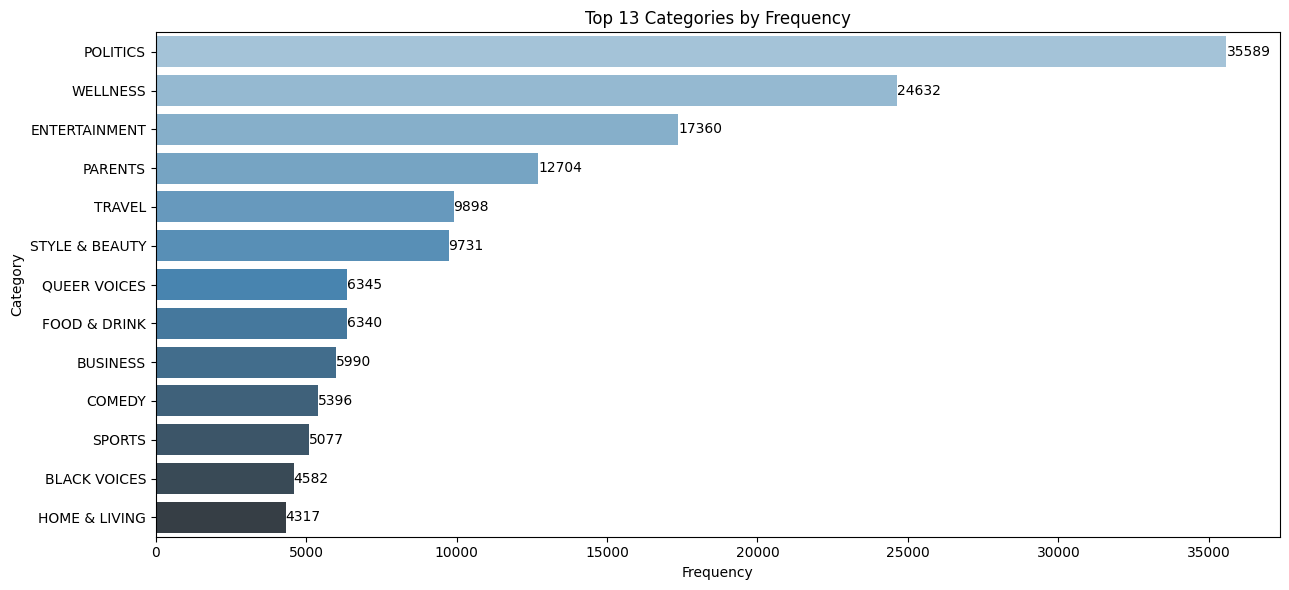

In [28]:
# Create a horizontal bar chart
plt.figure(figsize=(13, 6))
sns.barplot(x=top_13_categories.values, y=top_13_categories.index, palette='Blues_d')

# Display frequency values at the end of each bar
for i, value in enumerate(top_13_categories.values):
    plt.text(value, i, f'{int(value)}', va='center')

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Top 13 Categories by Frequency')
plt.tight_layout()
plt.show()


- **Top 5 Categories**
  - Politics: 35k
  - Wellness: 24k
  - Entertainment: 17k
  - Parents: 12k
  - Travel: 9k


- Pie chart of the top 13 categories.


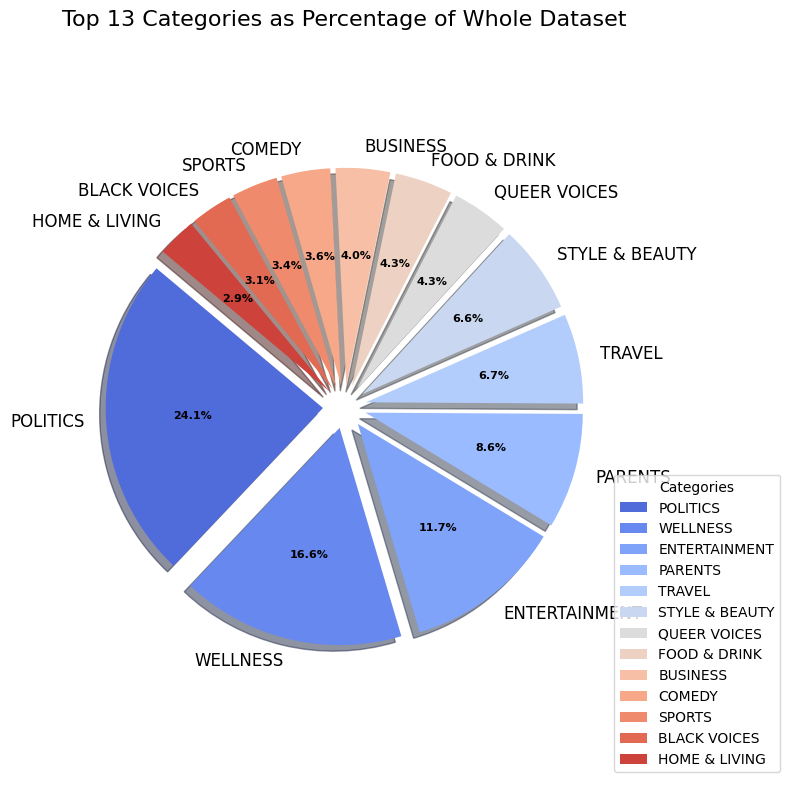

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of each category
category_percentage = (top_13_categories / df.shape[0]) * 100

# Create a pie chart with spacing
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    category_percentage, 
    labels=top_13_categories.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('coolwarm', len(top_13_categories)),  # New color palette
    shadow=True, 
    explode=[0.1] * len(top_13_categories)  # Space between slices
)

# Enhance the text appearance
for text in texts:
    text.set_color('Black')
    text.set_fontsize(12)

for autotext in autotexts:
    autotext.set_color('Black')
    autotext.set_fontsize(8)
    autotext.set_weight('bold')

# Add a legend
plt.legend(wedges, top_13_categories.index, title="Categories", loc="lower left", bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
plt.title('Top 13 Categories as Percentage of Whole Dataset', fontsize=16, color='Black')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.tight_layout()

# Display the plot
plt.show()


- Politics accounts for 24% of the whole dataset.
- The top 5 categories, i.e., [Politics, Wellness, Entertainment, Parents, Travel], cover more than 50% of the news articles.
- After politics, people are more interested in wellness and entertainment.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


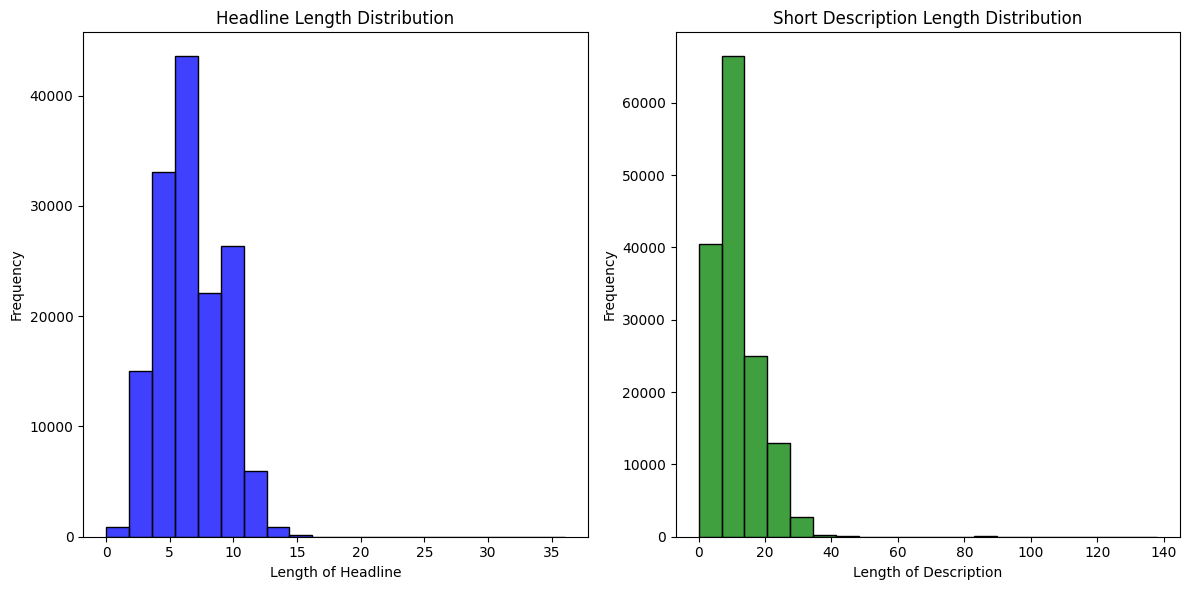

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate the lengths of text for each column
df['headline_length'] = df['headline_processed'].apply(len)
df['description_length'] = df['short_description_processed'].apply(len)

# Step 2: Plotting

plt.figure(figsize=(12, 6))

# Plotting the distribution of headline lengths
plt.subplot(1, 2, 1)
sns.histplot(df['headline_length'], bins=20, color='blue')
plt.title('Headline Length Distribution')
plt.xlabel('Length of Headline')
plt.ylabel('Frequency')

# Plotting the distribution of description lengths
plt.subplot(1, 2, 2)
sns.histplot(df['description_length'], bins=20, color='green')
plt.title('Short Description Length Distribution')
plt.xlabel('Length of Description')
plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


- There are very few rows in which the headline isn't present.
- The majority of headlines have lengths between 5 to 10 words.
- Most short descriptions are between 0 to 20 word length, with a significant number having a length of 0.


In [31]:
# Count the number of rows where description_length is 0
total_description_zero = df[df['description_length'] == 0].shape[0]

# Output the result for description_length
print(f"Total number of rows where description_length is 0: {total_description_zero}")

# Count the number of rows where headline_length is 0
total_headline_zero = df[df['headline_length'] == 0].shape[0]

# Output the result for headline_length
print(f"Total number of rows where headline_length is 0: {total_headline_zero}")

# Count the number of rows where both headline_length and description_length are 0
total_both_zero = df[(df['headline_length'] == 0) & (df['description_length'] == 0)].shape[0]

# Output the result for both headline_length and description_length
print(f"Total number of rows where both headline_length and description_length are 0: {total_both_zero}")


Total number of rows where description_length is 0: 11798
Total number of rows where headline_length is 0: 54
Total number of rows where both headline_length and description_length are 0: 10


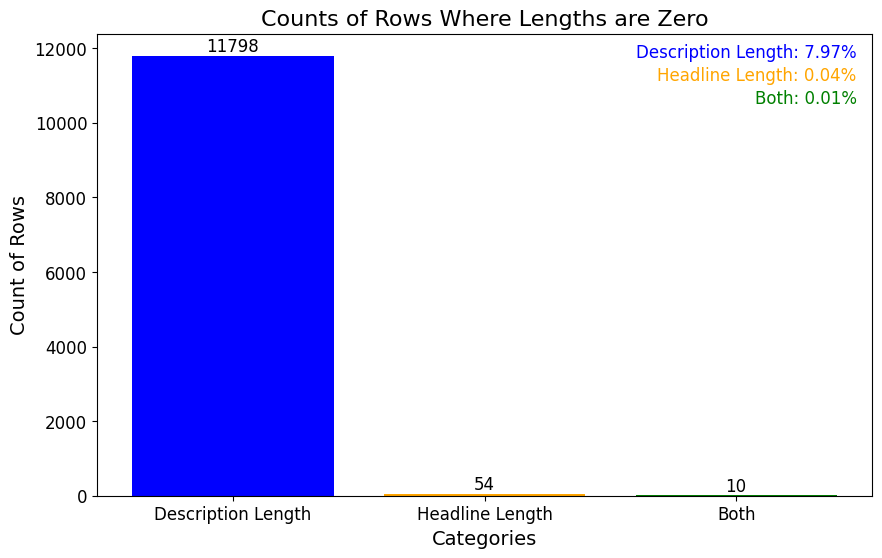

In [32]:
import matplotlib.pyplot as plt

# Data for the counts
categories = ['Description Length', 'Headline Length', 'Both']
counts = [total_description_zero, total_headline_zero, total_both_zero]

# Calculate total number of rows (assuming it's defined somewhere in your script)
total_rows = len(df)  # Example: total number of rows in your DataFrame

# Calculate percentages relative to total rows
percentages = [(count / total_rows) * 100 for count in counts]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, counts, color=['blue', 'orange', 'green'])

# Add frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom', fontsize=12)

# Add percentage text at the top right of the graph
percentage_text = '\n'.join([f'{cat}: {perc:.2f}%' for cat, perc in zip(categories, percentages)])
colors = ['blue', 'orange', 'green']
for i, line in enumerate(percentage_text.split('\n')):
    plt.text(0.98, 0.98 - i*0.05, line, transform=plt.gca().transAxes, fontsize=12, 
             va='top', ha='right', color=colors[i])

# Set titles and labels
plt.title('Counts of Rows Where Lengths are Zero', fontsize=16)
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Count of Rows', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)  # Disable the grid

# Show the plot
plt.show()


- No. of rows where description_length is 0: 11798
- No. of rows where headline_length is 0: 54
- No. of rows where both headline_length and description_length are 0: 10

In [33]:

# Remove rows where both 'description_length' and 'headline_length' are zero
df = df[~((df['description_length'] == 0) & (df['headline_length'] == 0))]

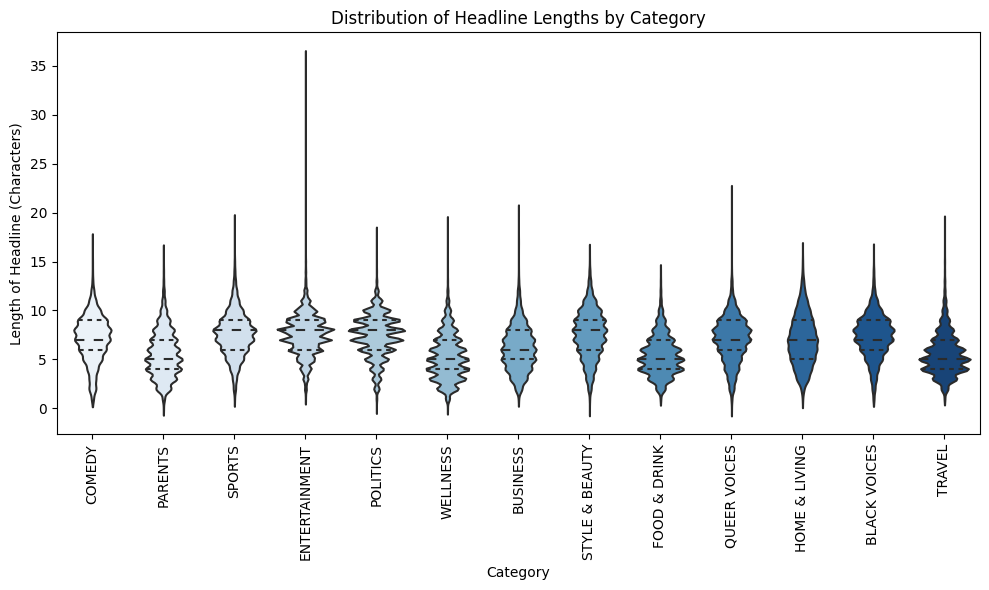

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure with specified size
plt.figure(figsize=(10, 6))

sns.violinplot(x='category', y='headline_length', data=df, palette='Blues', inner='quartile')

# Set the title of the plot
plt.title('Distribution of Headline Lengths by Category')

# Set the label for the x-axis
plt.xlabel('Category')

# Set the label for the y-axis
plt.ylabel('Length of Headline (Characters)')

# Rotate the x-axis tick labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Adjust the layout to make sure everything fits well in the figure
plt.tight_layout()

# Display the plot
plt.show()


- **Variation in Headline Lengths:** 
  - Each category shows a distinct distribution of headline lengths.
  
- **Entertainment Category:**
  - Has the widest distribution with some headlines reaching up to 35 word length.

- **Comedy, Parents, and Politics:**
  - These categories have shorter median headline lengths, typically under 10 word length.

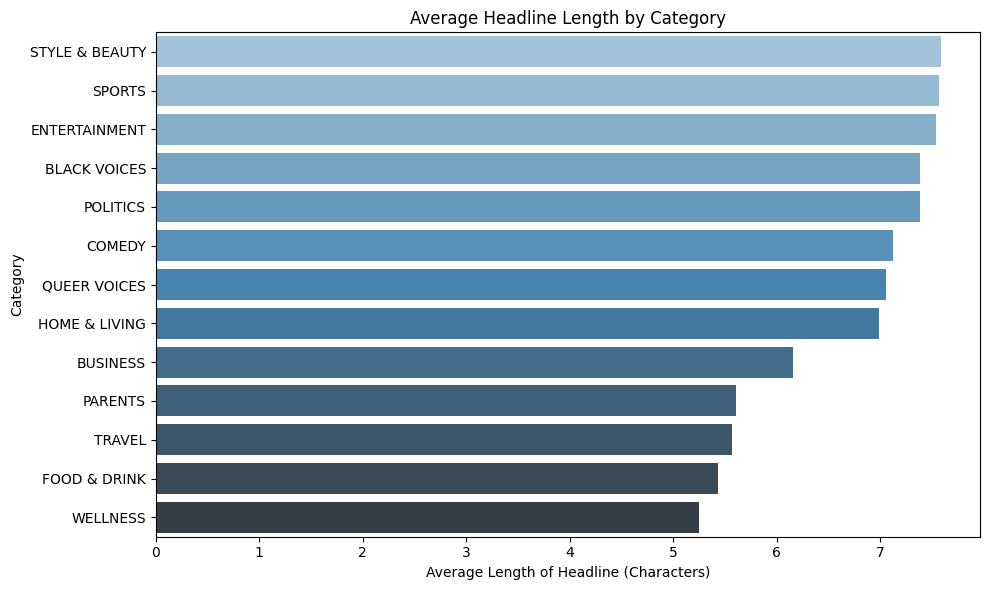

In [35]:
plt.figure(figsize=(10, 6))
avg_length_by_category = df.groupby('category')['headline_length'].mean().sort_values(ascending=False)
sns.barplot(x=avg_length_by_category.values, y=avg_length_by_category.index, palette='Blues_d')
plt.title('Average Headline Length by Category')
plt.xlabel('Average Length of Headline (Characters)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


- Average length is around 6-7 in headline.

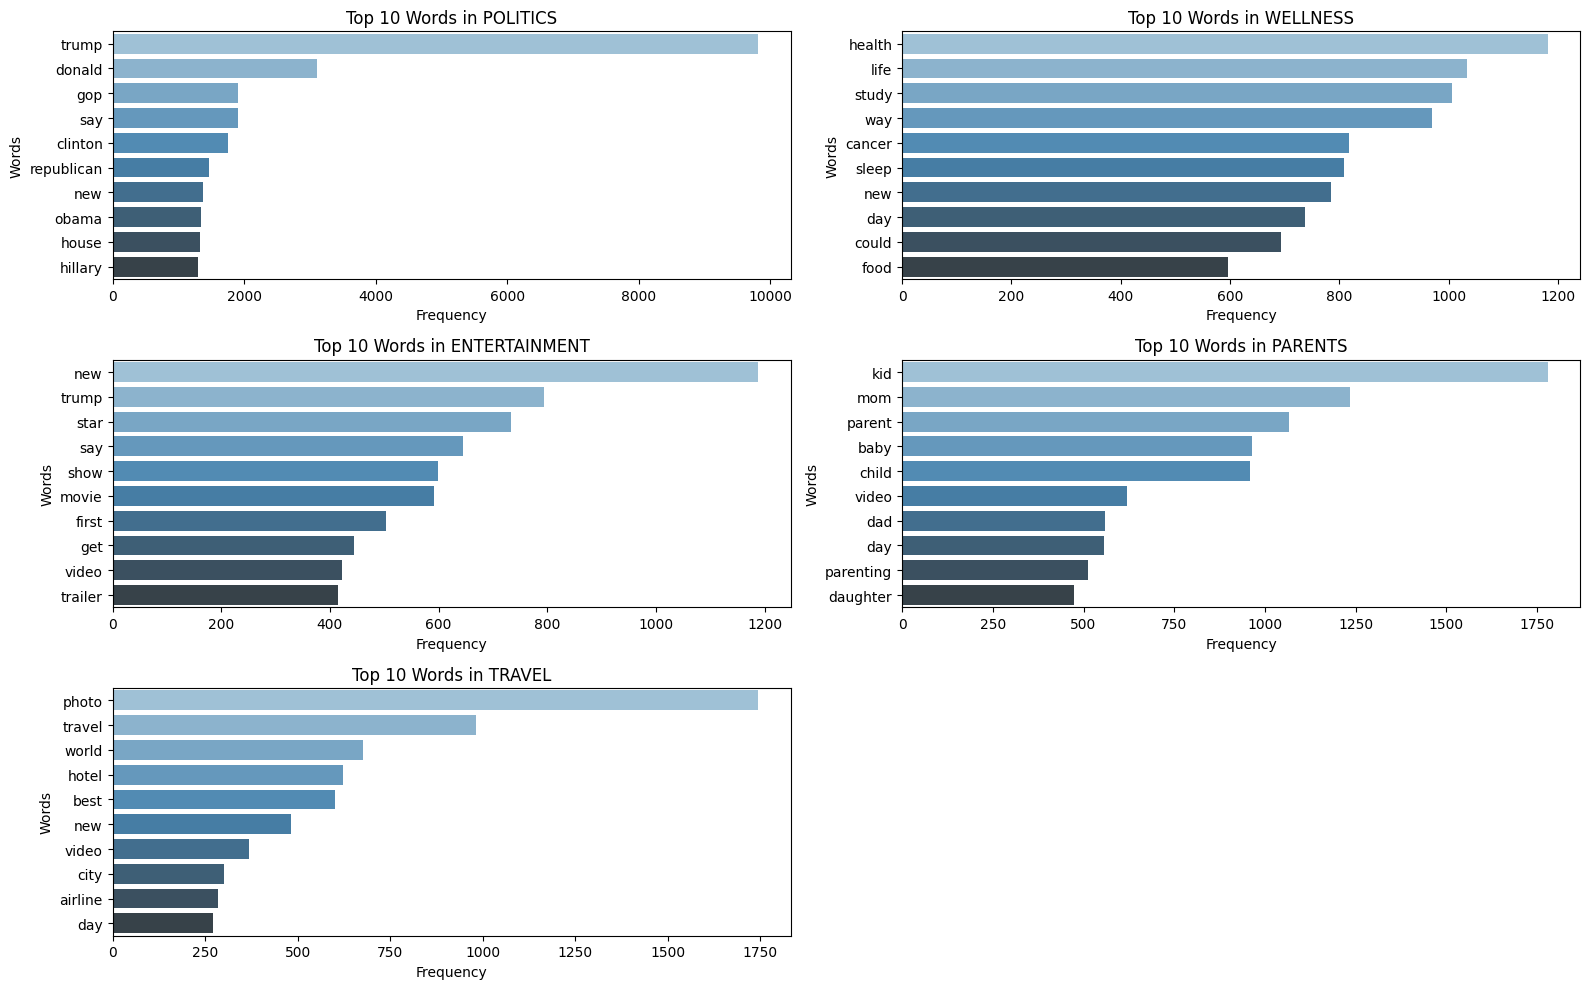

In [36]:
# Top 10 words in top 5 Category.

from collections import Counter

# Perform word frequency analysis for each category
category_word_counts = {}
for category in df['category'].unique():
    # Filter the dataframe for the current category
    category_df = df[df['category'] == category]
    
    # Combine all words in this category
    all_words = sum(category_df['headline_processed'], [])
    
    # Count word frequencies
    word_counts = Counter(all_words).most_common(10)  # Get top 10 most common words for the category
    category_word_counts[category] = dict(word_counts)

word_counts_df = pd.DataFrame(category_word_counts)# Loop through the top 5 categories

top_5_categories = df['category'].value_counts().index[:5]

plt.figure(figsize=(16, 10))

# Create subplots for the top 5 categories
for i, category in enumerate(top_5_categories, 1):
    # Get the top words for the current category
    top_words = word_counts_df[category].dropna().sort_values(ascending=False)[:10]  # Top 10 words

    # Create a subplot for each category
    plt.subplot(3, 2, i)
    sns.barplot(x=top_words.values, y=top_words.index, palette='Blues_d')
    
    # Set the title and labels
    plt.title(f'Top 10 Words in {category}')
    plt.xlabel('Frequency')
    plt.ylabel('Words')

# Adjust layout
plt.tight_layout()
plt.show()


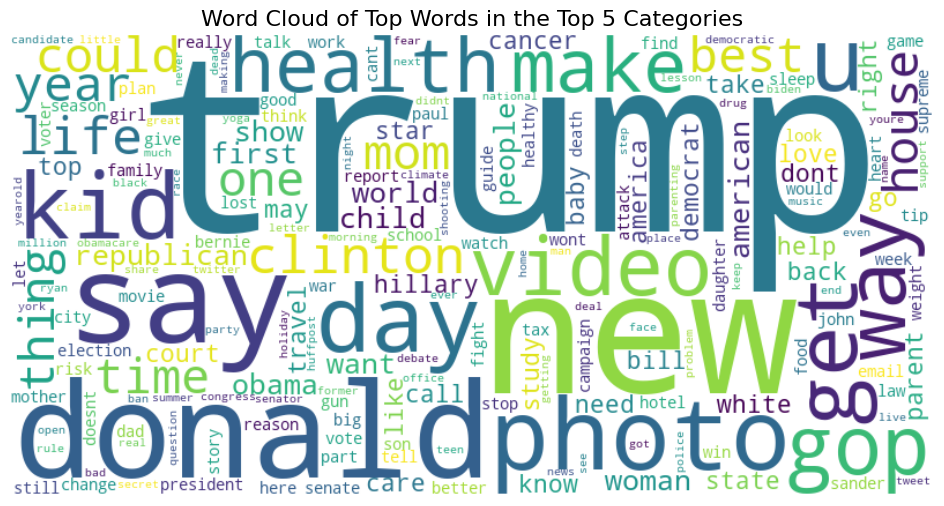

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame with columns 'category' and 'headline_processed'

# Get the top 5 categories based on their frequency
top_5_categories = df['category'].value_counts().index[:5]

# Initialize an empty list to hold words from the top categories
top_words = []

# Combine all words from the headlines in the top 5 categories
for category in top_5_categories:
    category_words = sum(df[df['category'] == category]['headline_processed'], [])
    top_words.extend(category_words)

# Count word frequencies for the combined words from top categories
word_counts = Counter(top_words)

# Create a word cloud with the combined words from top 5 categories
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plotting the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Top Words in the Top 5 Categories', fontsize=16)
plt.show()


**Politics**
- "Donald Trump" is the most searched keyword.

**Wellness**
- "Health," "life," and "sleep" are the most searched words.

**Entertainment**
- "Trump," "movie," and "video" are popular search terms.

**Parent**
- "Kid," "mom," "dad," and "daughter" are frequently searched words.

**Travel**
- "Hotel," "photo," "airline," and "vacation" are the most searched terms.


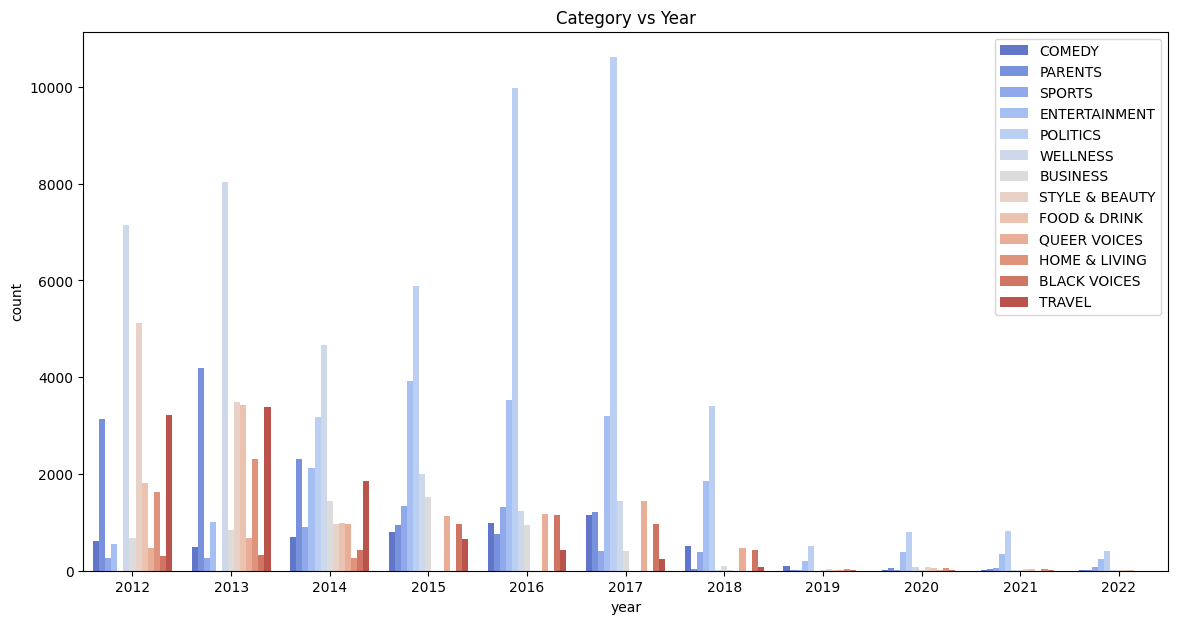

In [38]:
# Plotting category vs year
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='year', hue='category', palette='coolwarm')
plt.title('Category vs Year')
plt.legend(loc='upper right')
plt.show()


### Category vs. Year Distribution

The figure illustrates the distribution of articles across different categories over the years from 2012 to 2022. Key observations:

- **Peak in 2016-2017**: Categories like **Politics**, **Entertainment**, and **Sports** saw significant peaks during these years.
- **Earlier Years (2012-2014)**: Categories like **Wellness**, **Parents**, and **Food & Drink** dominated with more frequent publications.
- **Decline Post-2017**: After 2017, the number of articles across most categories dropped, with very few entries between 2018-2022.


In [ ]:
# Group by month and category, then count the occurrences of top 5 Category
category_counts = df.groupby(['month', 'category']).size().reset_index(name='count')

# Sort the counts by month and then by category count
category_counts = category_counts.sort_values(by=['month', 'count'], ascending=[True, False])

# Get the top 5 categories for each month
top5_categories_per_month = category_counts.groupby('month').head(5)

# Plot the results
plt.figure(figsize=(14, 8))
sns.barplot(x='month', y='count', hue='category', data=top5_categories_per_month, palette='tab10')
plt.title('Top 5 Categories for Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()


- Every month, news related to Politics was the most frequent, followed by Wellness and then Entertainment.

In [41]:
def undersample_categories(df, target_column, max_count):
    # Group by the target column and apply undersampling
    undersampled_df = df.groupby(target_column).apply(
        lambda x: x.sample(min(len(x), max_count), random_state=42) if len(x) > max_count else x
    ).reset_index(drop=True)
    
    return undersampled_df

# Apply undersampling with a maximum of 10,000 instances per category
undersampled_df = undersample_categories(df, 'category', max_count=10000)

print("\nUndersampled Class Distribution:")
print(undersampled_df['category'].value_counts())


Undersampled Class Distribution:
category
ENTERTAINMENT     10000
PARENTS           10000
POLITICS          10000
WELLNESS          10000
TRAVEL             9898
STYLE & BEAUTY     9731
QUEER VOICES       6344
FOOD & DRINK       6340
BUSINESS           5989
COMEDY             5394
SPORTS             5077
BLACK VOICES       4582
HOME & LIVING      4317
Name: count, dtype: int64


/tmp/ipykernel_30/808356743.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  undersampled_df = df.groupby(target_column).apply(


In [42]:
df.sample()

,headline,category,short_description,year,month,day_of_week,headline_processed,short_description_processed,headline_length,description_length
28012,"No, Mr. President, A Wall Won’t Stop Opioid Overdose Deaths",WELLNESS,"We know what to do. Now, we have to roll up our sleeves and do it.",2017,Aug,Wednesday,"[mr, president, wall, wont, stop, opioid, overdose, death]","[know, roll, sleeve]",8,3


# Traditional ML Approach

## Using TF-IDF vectorization

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

- Train and evaluate on Naive Bayes

In [37]:
# Ensure all values in 'headline_processed' are strings by joining lists if necessary
df["headline_processed"] = df["headline_processed"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

# Step 1: Convert text data into numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["headline_processed"].astype(str))  # Ensure all text data is a string

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.20, random_state=42)

# Step 3: Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Step 4: Make predictions with Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Step 5: Evaluate Naive Bayes model
print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_nb, average='weighted')
recall = recall_score(y_test, y_pred_nb, average='weighted')
f1 = f1_score(y_test, y_pred_nb, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Model:
Accuracy: 0.6214389510324085
Precision: 0.7154714832374196
Recall: 0.6214389510324085
F1 Score: 0.5713290316716877

Classification Report:
                precision    recall  f1-score   support

  BLACK VOICES       1.00      0.01      0.02       863
      BUSINESS       0.95      0.06      0.12      1194
        COMEDY       0.81      0.04      0.07      1100
 ENTERTAINMENT       0.59      0.74      0.66      3488
  FOOD & DRINK       0.91      0.45      0.60      1337
 HOME & LIVING       0.96      0.28      0.44       867
       PARENTS       0.78      0.46      0.58      2542
      POLITICS       0.55      0.97      0.71      7057
  QUEER VOICES       0.95      0.16      0.27      1217
        SPORTS       0.91      0.18      0.30      1012
STYLE & BEAUTY       0.85      0.64      0.73      1988
        TRAVEL       0.84      0.54      0.66      2003
      WELLNESS       0.57      0.83      0.68      4923

      accuracy                           0.62     29591


- Train and evaluate on LogisticRegression

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['category'], test_size=0.20, random_state=42)

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions with the Logistic Regression model
y_pred_lr = log_reg_model.predict(X_test)

# Evaluate the Logistic Regression model
print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Model:
Accuracy: 0.7473218208238992
Precision: 0.750359001280752
Recall: 0.7473218208238992
F1 Score: 0.740300422628785

Classification Report:
                precision    recall  f1-score   support

  BLACK VOICES       0.67      0.35      0.46       863
      BUSINESS       0.69      0.42      0.52      1194
        COMEDY       0.68      0.42      0.52      1100
 ENTERTAINMENT       0.69      0.75      0.72      3488
  FOOD & DRINK       0.82      0.67      0.74      1337
 HOME & LIVING       0.83      0.66      0.73       867
       PARENTS       0.75      0.70      0.73      2542
      POLITICS       0.80      0.90      0.85      7057
  QUEER VOICES       0.86      0.64      0.73      1217
        SPORTS       0.78      0.63      0.70      1012
STYLE & BEAUTY       0.81      0.78      0.79      1988
        TRAVEL       0.80      0.75      0.77      2003
      WELLNESS       0.66      0.85      0.74      4923

      accuracy                           0.75    

## Using with n-gram ranges

### Ngram range --> (1,2)

In [49]:
# Step 1: If 'headline_processed' contains tokenized text (lists of words), convert lists back to strings
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Convert text data into numerical form using TfidfVectorizer with n-grams (1, 2)
vectorizer_1_2 = TfidfVectorizer(ngram_range=(1, 2))  # Use unigrams and bigrams

# Transform the text data to numeric form
X_1_2 = vectorizer_1_2.fit_transform(df["headline_processed"])  # Convert all text into numeric features

# Split the data into training and testing sets
X_train_1_2, X_test_1_2, y_train_1_2, y_test_1_2 = train_test_split(X_1_2, df['category'], test_size=0.2, random_state=42)



# Train Naive Bayes model
nb_model_1_2 = MultinomialNB()
nb_model_1_2.fit(X_train_1_2, y_train_1_2)

# Make predictions with Naive Bayes model
y_pred_nb_1_2 = nb_model_1_2.predict(X_test_1_2)

# Evaluate Naive Bayes model
print("\nNaive Bayes Model (N-grams 1, 2):")
print("Accuracy:", accuracy_score(y_test_1_2, y_pred_nb_1_2))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_2, y_pred_nb_1_2, average='weighted')
recall = recall_score(y_test_1_2, y_pred_nb_1_2, average='weighted')
f1 = f1_score(y_test_1_2, y_pred_nb_1_2, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_2, y_pred_nb_1_2))


Naive Bayes Model (N-grams 1, 2):
Accuracy: 0.5420567064310094


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.6887433358836685
Recall: 0.5420567064310094
F1 Score: 0.4757365956951617

Classification Report:


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

  BLACK VOICES       0.00      0.00      0.00       863
      BUSINESS       0.93      0.02      0.04      1194
        COMEDY       0.90      0.02      0.03      1100
 ENTERTAINMENT       0.66      0.64      0.65      3488
  FOOD & DRINK       0.96      0.22      0.36      1337
 HOME & LIVING       0.98      0.16      0.28       867
       PARENTS       0.89      0.28      0.42      2542
      POLITICS       0.44      0.99      0.60      7057
  QUEER VOICES       0.97      0.05      0.10      1217
        SPORTS       0.93      0.03      0.05      1012
STYLE & BEAUTY       0.92      0.52      0.67      1988
        TRAVEL       0.91      0.32      0.47      2003
      WELLNESS       0.56      0.79      0.65      4923

      accuracy                           0.54     29591
     macro avg       0.77      0.31      0.33     29591
  weighted avg       0.69      0.54      0.48     29591



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
# Train Logistic Regression model
log_reg_model_1_2 = LogisticRegression(max_iter=1000)
log_reg_model_1_2.fit(X_train_1_2, y_train_1_2)

# Make predictions with Logistic Regression model
y_pred_lr_1_2 = log_reg_model_1_2.predict(X_test_1_2)

# Evaluate Logistic Regression model
print("\nLogistic Regression Model (N-grams 1, 2):")
print("Accuracy:", accuracy_score(y_test_1_2, y_pred_lr_1_2))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_2, y_pred_lr_1_2, average='weighted')
recall = recall_score(y_test_1_2, y_pred_lr_1_2, average='weighted')
f1 = f1_score(y_test_1_2, y_pred_lr_1_2, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_2, y_pred_lr_1_2))


Logistic Regression Model (N-grams 1, 2):
Accuracy: 0.731641377445845
Precision: 0.7438115641434901
Recall: 0.731641377445845
F1 Score: 0.7208631853256233

Classification Report:
                precision    recall  f1-score   support

  BLACK VOICES       0.73      0.27      0.40       863
      BUSINESS       0.73      0.33      0.46      1194
        COMEDY       0.72      0.39      0.50      1100
 ENTERTAINMENT       0.69      0.75      0.72      3488
  FOOD & DRINK       0.85      0.61      0.71      1337
 HOME & LIVING       0.85      0.59      0.70       867
       PARENTS       0.76      0.70      0.73      2542
      POLITICS       0.76      0.92      0.83      7057
  QUEER VOICES       0.88      0.59      0.70      1217
        SPORTS       0.80      0.54      0.64      1012
STYLE & BEAUTY       0.80      0.76      0.77      1988
        TRAVEL       0.80      0.70      0.75      2003
      WELLNESS       0.62      0.86      0.72      4923

      accuracy                    

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
# Step 1: If 'headline_processed' contains tokenized text (lists of words), convert lists back to strings
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Convert text data into numerical form using TfidfVectorizer with n-grams (1, 3)
vectorizer_1_3 = TfidfVectorizer(ngram_range=(1, 3))  # Use unigrams, bigrams, and trigrams

# Transform the text data to numeric form
X_1_3 = vectorizer_1_3.fit_transform(df["headline_processed"])  # Convert all text into numeric features

# Step 3: Split the data into training and testing sets
X_train_1_3, X_test_1_3, y_train_1_3, y_test_1_3 = train_test_split(X_1_3, df['category'], test_size=0.2, random_state=42)

# Step 4: Train Naive Bayes model
nb_model_1_3 = MultinomialNB()
nb_model_1_3.fit(X_train_1_3, y_train_1_3)

# Step 5: Make predictions with Naive Bayes model
y_pred_nb_1_3 = nb_model_1_3.predict(X_test_1_3)

# Step 6: Evaluate Naive Bayes model
print("Naive Bayes Model (N-grams 1, 3):")
print("Accuracy:", accuracy_score(y_test_1_3, y_pred_nb_1_3))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_3, y_pred_nb_1_3, average='weighted')
recall = recall_score(y_test_1_3, y_pred_nb_1_3, average='weighted')
f1 = f1_score(y_test_1_3, y_pred_nb_1_3, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_3, y_pred_nb_1_3))


Naive Bayes Model (N-grams 1, 3):
Accuracy: 0.5041397722280423
Precision: 0.7207345180800717
Recall: 0.5041397722280423
F1 Score: 0.4307680090674426

Classification Report:
                precision    recall  f1-score   support

  BLACK VOICES       1.00      0.00      0.00       863
      BUSINESS       0.96      0.02      0.04      1194
        COMEDY       1.00      0.02      0.04      1100
 ENTERTAINMENT       0.69      0.56      0.62      3488
  FOOD & DRINK       0.97      0.15      0.26      1337
 HOME & LIVING       0.98      0.11      0.20       867
       PARENTS       0.90      0.20      0.33      2542
      POLITICS       0.40      0.99      0.57      7057
  QUEER VOICES       0.98      0.04      0.07      1217
        SPORTS       0.93      0.01      0.03      1012
STYLE & BEAUTY       0.95      0.45      0.61      1988
        TRAVEL       0.92      0.21      0.34      2003
      WELLNESS       0.55      0.77      0.64      4923

      accuracy                           

In [53]:


# Step 1: If 'headline_processed' contains tokenized text (lists of words), convert lists back to strings
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Step 2: Convert text data into numerical form using TfidfVectorizer with n-grams (1, 3)
vectorizer_1_3 = TfidfVectorizer(ngram_range=(1, 3))  # Use unigrams, bigrams, and trigrams

# Transform the text data to numeric form
X_1_3 = vectorizer_1_3.fit_transform(df["headline_processed"])  # Convert all text into numeric features

# Step 3: Split the data into training and testing sets
X_train_1_3, X_test_1_3, y_train_1_3, y_test_1_3 = train_test_split(X_1_3, df['category'], test_size=0.2, random_state=42)

# Step 4: Train Logistic Regression model
log_reg_model_1_3 = LogisticRegression(max_iter=1000)
log_reg_model_1_3.fit(X_train_1_3, y_train_1_3)

# Step 5: Make predictions with Logistic Regression model
y_pred_lr_1_3 = log_reg_model_1_3.predict(X_test_1_3)

# Step 6: Evaluate Logistic Regression model
print("\nLogistic Regression Model (N-grams 1, 3):")
print("Accuracy:", accuracy_score(y_test_1_3, y_pred_lr_1_3))

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_1_3, y_pred_lr_1_3, average='weighted')
recall = recall_score(y_test_1_3, y_pred_lr_1_3, average='weighted')
f1 = f1_score(y_test_1_3, y_pred_lr_1_3, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optionally print classification report for detailed metrics
print("\nClassification Report:")
print(classification_report(y_test_1_3, y_pred_lr_1_3))


Logistic Regression Model (N-grams 1, 3):
Accuracy: 0.7120408232232773
Precision: 0.7299212725313918
Recall: 0.7120408232232773
F1 Score: 0.6973113181872648

Classification Report:
                precision    recall  f1-score   support

  BLACK VOICES       0.72      0.23      0.35       863
      BUSINESS       0.75      0.27      0.40      1194
        COMEDY       0.73      0.34      0.46      1100
 ENTERTAINMENT       0.67      0.74      0.70      3488
  FOOD & DRINK       0.85      0.56      0.67      1337
 HOME & LIVING       0.86      0.54      0.67       867
       PARENTS       0.75      0.69      0.72      2542
      POLITICS       0.73      0.92      0.81      7057
  QUEER VOICES       0.89      0.54      0.67      1217
        SPORTS       0.78      0.46      0.58      1012
STYLE & BEAUTY       0.78      0.73      0.75      1988
        TRAVEL       0.81      0.67      0.73      2003
      WELLNESS       0.60      0.86      0.71      4923

      accuracy                  

# Model Performance Summary



| Model                                   | Accuracy (%) | Precision (%) | Recall (%)  | F1 Score (%) |
|-----------------------------------------|--------------|---------------|-------------|--------------|
| **Naive Bayes Model**                   | 61.76        | 71.37         | 61.76       | 56.59        |
| **Logistic Regression Model**           | 74.48        | 74.77         | 74.48       | 73.76        |
| **Naive Bayes Model (N-grams 1, 2)**    | 54.20        | 68.87         | 54.20       | 47.57        |
| **Logistic Regression Model (N-grams 1, 2)** | 73.20    | 74.42         | 73.20       | 72.14        |
| **Naive Bayes Model (N-grams 1, 3)**    | 50.41        | 72.07         | 50.41       | 43.07        |
| **Logistic Regression Model (N-grams 1, 3)** | 71.18    | 73.01         | 71.18       | 69.69        |


# Deep Learning Apporach

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, BatchNormalization, Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np


In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Combine processed text into a single column for tokenization
df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x))


In [ ]:
# Tokenize the text
tokenizer = Tokenizer(num_words=10000)  
tokenizer.fit_on_texts(df['headline_processed'])
sequences = tokenizer.texts_to_sequences(df['headline_processed'])

# Pad the sequences
max_length = 100  # Adjust max_length based on your data
X = pad_sequences(sequences, maxlen=max_length)
y = df['category']

# Convert labels to numeric values
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Ensure TensorFlow uses the GPU if available
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print(f"GPU detected: {physical_devices}")
    try:
        # Set memory growth to avoid memory allocation issues
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected. Using CPU instead.")




GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [32]:
class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data):
        super(MetricsCallback, self).__init__()
        self.val_data = val_data

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.val_data
        y_pred = np.argmax(self.model.predict(X_val), axis=-1)
        
        precision = precision_score(y_val, y_pred, average='weighted')
        recall = recall_score(y_val, y_pred, average='weighted')
        f1 = f1_score(y_val, y_pred, average='weighted')
        
        print(f"Epoch {epoch + 1}: Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

In [33]:
# Define the enhanced model with additional layers
with tf.device('/GPU:0'):  # Explicitly set the GPU device
    model = Sequential()

    # Embedding Layer
    model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))  

    # Add Bi-LSTM Layer
    model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.30)))  # Return sequences to stack more LSTM layers

    # Add another Bi-LSTM Layer
    model.add(Bidirectional(LSTM(64, dropout=0.30)))  # Stack another LSTM with fewer units

    # Add Batch Normalization to stabilize and accelerate training
    model.add(BatchNormalization())

    # Add another Dense Layer with Dropout to avoid overfitting
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # L2 regularization added
    model.add(Dropout(0.4))  # Dropout layer with 40% rate

    # Add Output Layer
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output for multi-class classification

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
# Create an instance of the MetricsCallback with validation data
metrics_callback = MetricsCallback(val_data=(X_test, y_test))

# Train the model on the GPU with the custom callback
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train,
                        epochs=6,
                        batch_size=32,
                        validation_data=(X_test, y_test),
                        callbacks=[metrics_callback])

Epoch 1/6
611/611 ━━━━━━━━━━━━━━━━━━━━ 58s 94ms/step
Epoch 1: Precision: 0.7141, Recall: 0.7081, F1 Score: 0.7070
2442/2442 ━━━━━━━━━━━━━━━━━━━━ 1156s 471ms/step - accuracy: 0.4594 - loss: 1.9899 - val_accuracy: 0.7081 - val_loss: 1.0317
Epoch 2/6
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 93ms/step
Epoch 2: Precision: 0.7295, Recall: 0.7204, F1 Score: 0.7193
2442/2442 ━━━━━━━━━━━━━━━━━━━━ 1149s 471ms/step - accuracy: 0.7268 - loss: 1.0150 - val_accuracy: 0.7204 - val_loss: 1.0089
Epoch 3/6
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 93ms/step
Epoch 3: Precision: 0.7301, Recall: 0.7272, F1 Score: 0.7275
2442/2442 ━━━━━━━━━━━━━━━━━━━━ 1150s 471ms/step - accuracy: 0.7668 - loss: 0.8807 - val_accuracy: 0.7272 - val_loss: 0.9780
Epoch 4/6
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 93ms/step
Epoch 4: Precision: 0.7292, Recall: 0.7266, F1 Score: 0.7265
2442/2442 ━━━━━━━━━━━━━━━━━━━━ 1193s 489ms/step - accuracy: 0.7927 - loss: 0.7980 - val_accuracy: 0.7266 - val_loss: 0.9780
Epoch 5/6
611/611 ━━━━━━━━━━━━━━━━━━━━ 57s 94ms/

In [35]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# If using a feedforward model, you can also print loss
print(f"Test Loss: {loss:.2f}")


611/611 ━━━━━━━━━━━━━━━━━━━━ 58s 95ms/step - accuracy: 0.7233 - loss: 1.0370
Test Accuracy: 0.73
Test Loss: 1.03


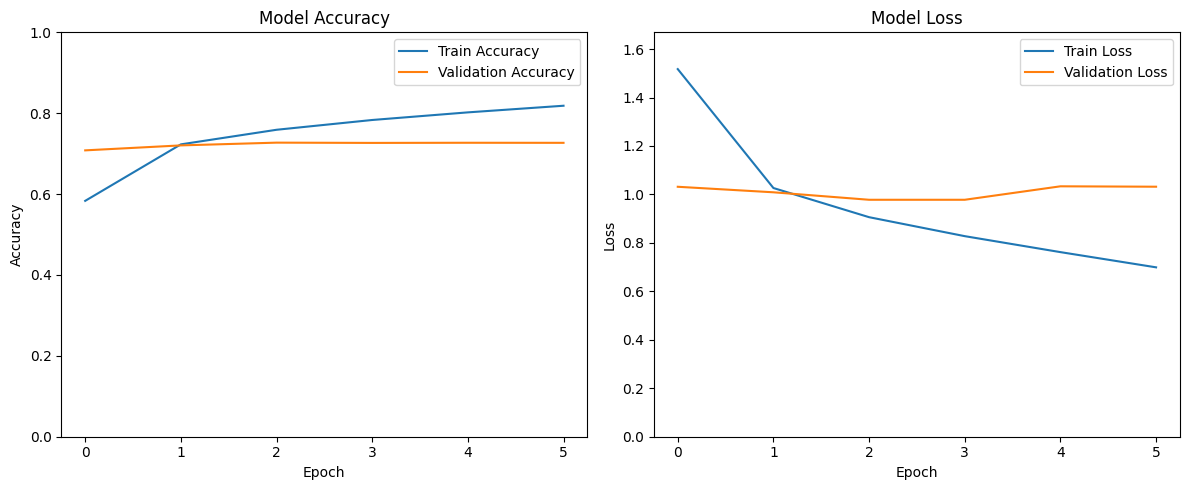

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, 1)  # Set y-axis limits for accuracy

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)  # Set y-axis limits for loss

plt.tight_layout()
plt.show()

### Model Test Results

| Metric        | Value (%) |
|---------------|-----------|
| **Test Accuracy** | 73.00     |
| **Test Loss**     | 1.03      |
| **Precision**     | 72.67     |
| **Recall**        | 72.68     |
| **F1 Score**      | 72.61     |


#  Transfer Learning Approach

### Distillbert 

In [49]:
import pandas as pd
import numpy as np
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [50]:
# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [51]:

# # Convert list of words to sentences
# df['headline'] = df['headline'].apply(lambda x: ' '.join(x))

# Label encode the categories
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['category_encoded'], test_size=0.2, random_state=42)

In [52]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [53]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_encoder.classes_)).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = CustomDataset(X_test, y_test, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, pin_memory=True if device.type == 'cpu' else False)
test_loader = DataLoader(test_dataset, batch_size=16, pin_memory=True if device.type == 'cpu' else False)

In [55]:
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [56]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    accuracy = accuracy_score(labels, preds)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

In [58]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)



In [59]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.832000,0.716730,0.782760,0.783846,0.782760,0.782115
2,0.514800,0.694674,0.795096,0.796132,0.795096,0.795148
3,0.301400,0.783882,0.792793,0.794990,0.792793,0.792732
4,0.184200,0.903497,0.789210,0.791166,0.789210,0.789150
5,0.079400,1.025355,0.791308,0.791260,0.791308,0.791018


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=12210, training_loss=0.4336915864429935, metrics={'train_runtime': 3280.5107, 'train_samples_per_second': 119.097, 'train_steps_per_second': 3.722, 'total_flos': 1.29412913509632e+16, 'train_loss': 0.4336915864429935, 'epoch': 5.0})

In [29]:
# Evaluate the model on the test dataset and print results including losses and metrics.
eval_results = trainer.evaluate()
print("Evaluation Results:")
print(eval_results)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation Results:
{'eval_loss': 1.1012619733810425, 'eval_accuracy': 0.6702497952497952, 'eval_precision': 0.673909027320064, 'eval_recall': 0.6702497952497952, 'eval_f1': 0.6680836593324373, 'eval_runtime': 66.0531, 'eval_samples_per_second': 295.762, 'eval_steps_per_second': 9.25, 'epoch': 5.0}


### Evaluation Results

| Metric              | Value       |
|---------------------|-------------|
| **Accuracy**        | 79.13%      |
| **Precision**       | 79.13%      |
| **Recall**          | 79.13%      |
| **F1 Score**        | 79.10%      |


### Roberta

In [19]:
import pandas as pd
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import classification_report

In [20]:
# Check if GPU is available and set device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [21]:

# # Convert list of words to sentences
# df['headline_processed'] = df['headline_processed'].apply(lambda x: ' '.join(x))

# Label encode the categories
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['headline'], df['category_encoded'], test_size=0.2, random_state=42)

In [22]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts.reset_index(drop=True)
        self.labels = labels.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Tokenize the text
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',  # Return PyTorch tensors, but keep them on the CPU
        )

        # Return tensors on CPU; the Trainer will handle moving them to the appropriate device
        return {
            'input_ids': encoding['input_ids'].flatten(),  # Remain on CPU
            'attention_mask': encoding['attention_mask'].flatten(),  # Remain on CPU
            'labels': torch.tensor(label, dtype=torch.long)  # Remain on CPU
        }


In [23]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_)).to(device)  # Move model to GPU if available

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
train_dataset = CustomDataset(X_train, y_train, tokenizer, max_length=128)
test_dataset = CustomDataset(X_test, y_test, tokenizer, max_length=128)

train_loader = DataLoader(train_dataset, batch_size=16, pin_memory=False)
test_loader = DataLoader(test_dataset, batch_size=16, pin_memory=False)

In [25]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch

    # Disable model saving
    save_strategy="no",           # No model saving during or after training
    save_total_limit=None,        # No limit on total saves (but save_strategy="no" prevents saving anyway)
    save_steps=None               # Disables saving at specific steps
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [26]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    # Compute precision, recall, f1 score (weighted)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    
    # Compute accuracy
    accuracy = accuracy_score(labels, preds)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'accuracy': accuracy
    }


In [27]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.871600,0.739308,0.775693,0.775440,0.773942,0.775440
2,0.664000,0.689756,0.795382,0.792127,0.792610,0.792127
3,0.474600,0.681110,0.804221,0.800317,0.800782,0.800317
4,0.359400,0.737012,0.802652,0.801443,0.800912,0.801443
5,0.234700,0.788771,0.803850,0.804156,0.803635,0.804156


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0

TrainOutput(global_step=12210, training_loss=0.5356868979678986, metrics={'train_runtime': 5956.2639, 'train_samples_per_second': 65.595, 'train_steps_per_second': 2.05, 'total_flos': 2.57019105195264e+16, 'train_loss': 0.5356868979678986, 'epoch': 5.0})

In [28]:
# Evaluate the model on the test dataset
eval_results = trainer.evaluate()
print("Evaluation Results:")
print(eval_results)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Evaluation Results:
{'eval_loss': 0.7887711524963379, 'eval_precision': 0.8038498171868063, 'eval_recall': 0.8041564291564292, 'eval_f1': 0.8036353130664006, 'eval_accuracy': 0.8041564291564292, 'eval_runtime': 93.1525, 'eval_samples_per_second': 209.721, 'eval_steps_per_second': 6.559, 'epoch': 5.0}


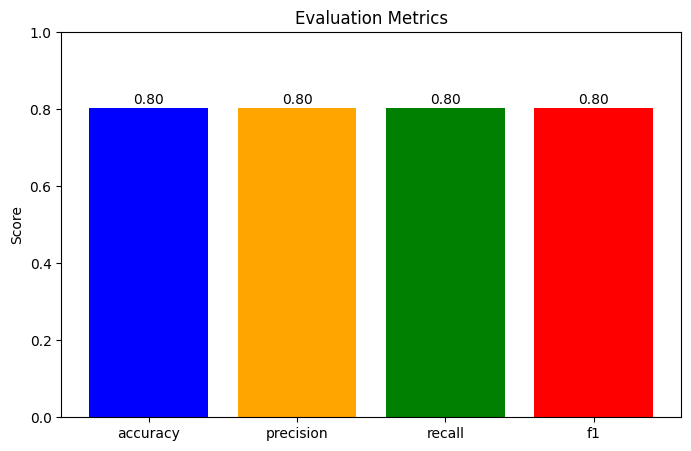

In [29]:
import matplotlib.pyplot as plt

# Extract metrics for visualization purposes
metrics_names = ['accuracy', 'precision', 'recall', 'f1']
metrics_values = [eval_results['eval_accuracy'], eval_results['eval_precision'], eval_results['eval_recall'], eval_results['eval_f1']]

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limits to be between 0 and 1

# Show percentages on top of the bars
for i in range(len(metrics_values)):
    plt.text(i, metrics_values[i] + 0.01, f'{metrics_values[i]:.2f}', ha='center')

plt.show()

### Evaluation Results

| Metric                  | Value       |
|-------------------------|-------------|
| **Accuracy**            | 80.42%      |
| **Precision**           | 80.38%      |
| **Recall**              | 80.42%      |
| **F1 Score**            | 80.36%      |


## Comparison of Models Based on F1 Score

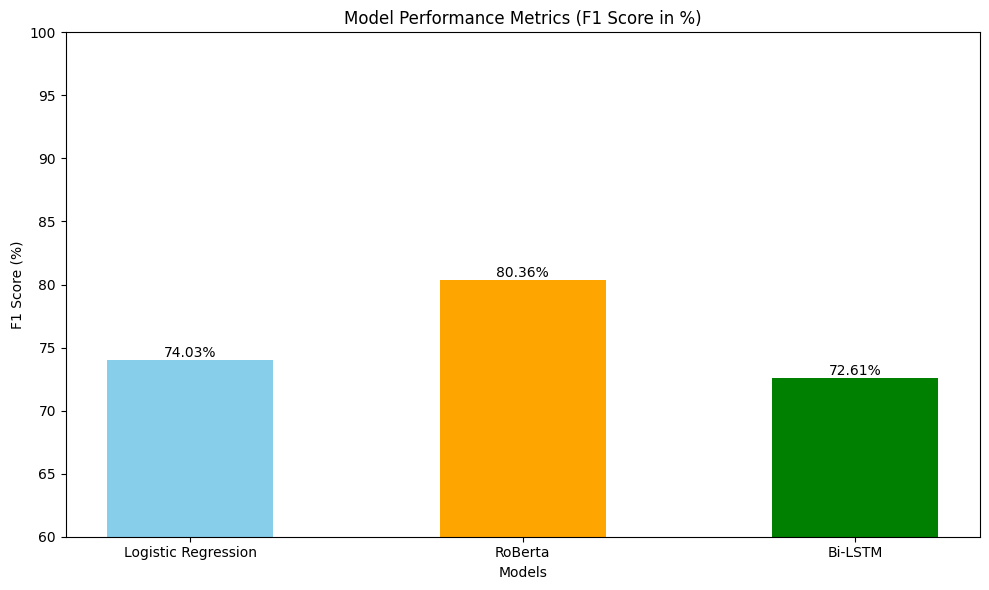

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Logistic Regression', 'RoBerta', 'Bi-LSTM']
f1_score = [0.7403, 0.8036, 0.7261]

# Convert F1 scores to percentages
f1_score_percentage = [score * 100 for score in f1_score]

# Preparing the data for plotting
x = np.arange(len(models))
bar_width = 0.5

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(x, f1_score_percentage, width=bar_width, color=['skyblue', 'orange', 'green'])

# Adding labels and title
plt.title('Model Performance Metrics (F1 Score in %)')
plt.xlabel('Models')
plt.ylabel('F1 Score (%)')
plt.xticks(x, models)
plt.ylim(60, 100)  # Set y-axis limits to focus on the relevant range

# Adding value labels on top of each bar (rounded to 2 decimal places)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Remove grid lines
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()


- RoBERTa outperforms the others with an F1 Score of **80.36%**.
- Bi-LSTM achieves an F1 Score of **72.61%**.
- Logistic Regression records an F1 Score o ****74.03%*.


# Future Scopes

- Experiment with more sophisticated models like Transformer-based architectures (e.g., GPT-4)
- Extend the model to support multiple languages, catering to a global audience.
- Integrate advanced libraries like TextBlob or SpaCy to automatically correct spelling,  improving data quality and model accuracy.

